## **1. Audit + Exploration des données**

**1.1.Avant Aggrégation  des données par jour**

## *a- Chargement de données :*

In [115]:
# import des bibliothéques
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats


# charger le jeu de données bike 

data = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/bike.csv')
data['dteday'] = pd.to_datetime(data.dteday, format='%Y-%m-%d')

# ajout de la colonne weekday pour le jour de semaine
data["weekday"]=data["dteday"].dt.day_name()

# informations des données data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   hr          17379 non-null  int64         
 2   weathersit  17379 non-null  object        
 3   hum         17379 non-null  float64       
 4   windspeed   17379 non-null  float64       
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   cnt         17379 non-null  int64         
 8   weekday     17379 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.2+ MB


Le jeu de données de bike contient 7 variables explicatives (dteday,hr,weathersit,hum,windspeed,temp,atemp) et une variable cible expliquée cnt, pas de NAN dans les données . L'objectif est de prédire le nombre de vélos utilisés d'un jour au lendemain . Il s'agit d'une problématique de regression puisque la cible cnt est **quantitative**






In [116]:
# description des données
data.describe()

,hr,hum,windspeed,temp,atemp,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.627229,12.736540,15.358397,15.401157,189.463088
std,6.914405,0.192930,8.196795,9.050138,11.342114,181.387599
min,0.000000,0.000000,0.000000,-7.060000,-16.000000,1.000000
25%,6.000000,0.480000,7.001500,7.980000,5.997800,40.000000
50%,12.000000,0.630000,12.998000,15.500000,15.996800,142.000000
75%,18.000000,0.780000,16.997900,23.020000,24.999200,281.000000
max,23.000000,1.000000,56.996900,39.000000,50.000000,977.000000


In [117]:
# Apercu des données
data.head()

,dteday,hr,weathersit,hum,windspeed,temp,atemp,cnt,weekday
0,2011-01-01,0,clear,0.81,0.0,3.28,3.0014,16,Saturday
1,2011-01-01,1,clear,0.80,0.0,2.34,1.9982,40,Saturday
2,2011-01-01,2,clear,0.80,0.0,2.34,1.9982,32,Saturday
3,2011-01-01,3,clear,0.75,0.0,3.28,3.0014,13,Saturday
4,2011-01-01,4,clear,0.75,0.0,3.28,3.0014,1,Saturday


## *b-Visulisation de données :*

Premiére analyse graphique ci-dessous de la variable cnt avec des boxplots montre qu'il y'a beaucoup d'outliers

No handles with labels found to put in legend.


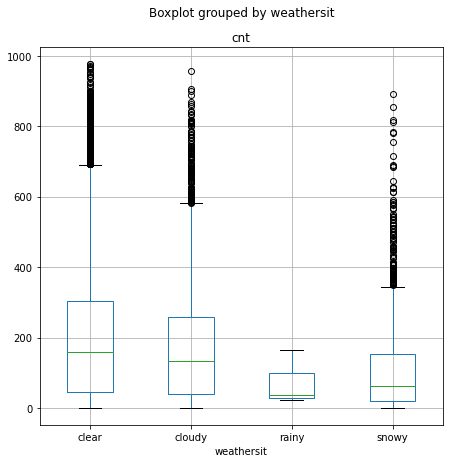

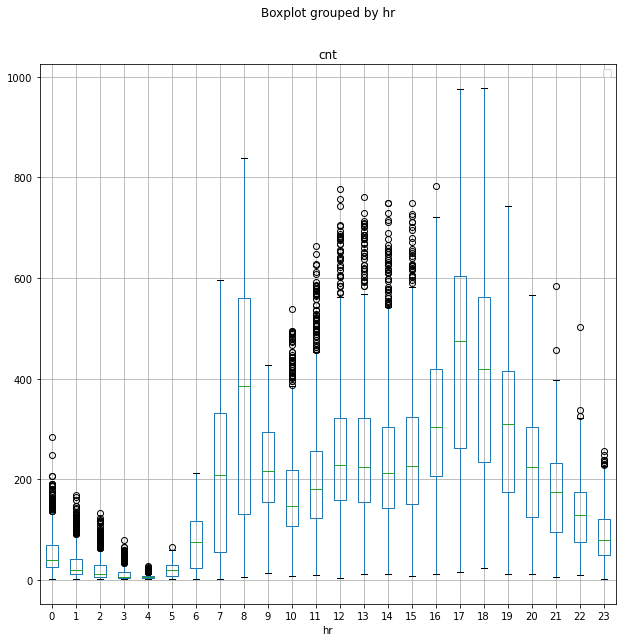

In [118]:

data.boxplot(column= 'cnt', by='weathersit', figsize= (7,7));
data.boxplot(column= 'cnt', by='hr', figsize= (10,10));
plt.legend();

**1.2.Aprés Aggrégation  des données par jour**

1.2.1.Aggrégation des données par jour de l'année

Nous allons maintenant aggréger les données par jour de l'année , en utilsant un groupby sur 'dteday' , le nouveau jeu de données est nommé 'data_jour_annee'

In [119]:
# créons un jeu de données qui contient  que le décompte de vélo du jour J et 7 derniers jours pendant 24 heures
functions_to_apply = {
    
    'cnt' : 'sum'
}
cnt_data = data.groupby('dteday').agg(functions_to_apply)
cnt_data['cnt_j_1']=cnt_data['cnt'].shift(periods=1)
cnt_data['cnt_j_2']=cnt_data['cnt'].shift(periods=2)
cnt_data['cnt_j_3']=cnt_data['cnt'].shift(periods=3)
cnt_data['cnt_j_4']=cnt_data['cnt'].shift(periods=4)
cnt_data['cnt_j_5']=cnt_data['cnt'].shift(periods=5)
cnt_data['cnt_j_6']=cnt_data['cnt'].shift(periods=6)
cnt_data['cnt_j_7']=cnt_data['cnt'].shift(periods=7)

# remplaçons les valeurs nan par la mediane 
cnt_data = cnt_data.fillna(cnt_data.median())

# Apercu des données cnt_data
cnt_data

,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,
2011-01-01,985,4548.5,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-02,801,985.0,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-03,1349,801.0,985.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-04,1562,1349.0,801.0,985.0,4553.0,4558.0,4563.0,4566.0
2011-01-05,1600,1562.0,1349.0,801.0,985.0,4558.0,4563.0,4566.0
...,...,...,...,...,...,...,...,...
2012-12-27,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0
2012-12-28,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0
2012-12-29,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0


In [120]:
# créons un jeu de données qui affiche le pourcentage de chaque classe du weathersit pendant 24 heures
weathersit_class = data.groupby('dteday').weathersit.value_counts(normalize=True).unstack().fillna(0)

# Apercu des données weathersit_class
weathersit_class.head()

weathersit,clear,cloudy,rainy,snowy
dteday,,,,
2011-01-01,0.500000,0.416667,0.0,0.083333
2011-01-02,0.260870,0.521739,0.0,0.217391
2011-01-03,1.000000,0.000000,0.0,0.000000
2011-01-04,0.956522,0.043478,0.0,0.000000
2011-01-05,1.000000,0.000000,0.0,0.000000


In [121]:
# Fonctions quantiles a appliquer dans functions_to_apply

# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

# fonction functions_to_apply pour passer en arguement dans agg 
functions_to_apply = {
    
    'hum' : ['min','max','mean',q25,q50,q75],
    'windspeed' :['min','max','mean',q25,q50,q75],
    'temp' : ['min','max','mean',q25,q50,q75],
    'atemp' : ['min','max','mean',q25,q50,q75]
  
}
#jeu de données data_jour_annee_avant_concat 
data_jour_annee_avant_concat = data.groupby('dteday').agg(functions_to_apply)

In [122]:
#Apercu du data_jour_annee_avant_concat 
data_jour_annee_avant_concat


hum                                        windspeed           \
             min   max      mean     q25    q50     q75       min      max   
dteday                                                                       
2011-01-01  0.72  0.94  0.805833  0.7575  0.800  0.8625    0.0000  19.9995   
2011-01-02  0.39  1.00  0.696087  0.5200  0.710  0.8100    8.9981  30.0026   
2011-01-03  0.30  0.69  0.437273  0.3500  0.440  0.4925    0.0000  27.9993   
2011-01-04  0.48  0.74  0.590435  0.5100  0.590  0.6600    0.0000  22.0028   
2011-01-05  0.28  0.74  0.436957  0.3500  0.400  0.4750    0.0000  22.0028   
...          ...   ...       ...     ...    ...     ...       ...      ...   
2012-12-27  0.49  0.93  0.652917  0.5600  0.600  0.7125   11.0014  35.0008   
2012-12-28  0.49  0.70  0.590000  0.5500  0.600  0.6400    0.0000  19.0012   
2012-12-29  0.56  1.00  0.752917  0.7000  0.750  0.8100    0.0000  36.9974   
2012-12-30  0.36  0.61  0.483333  0.4100  0.510  0.5600    0.0000  43.9989   
2012-12-31  0.44  0.69  0.577500  0.5325  0.595  0.6400    6.0032  15.0013   

                                  ...      temp                        atemp  \
                 mean        q25  ...      mean   q25    q50     q75     min   
dteday                            ...                                          
2011-01-01  10.749871   0.000000  ...  8.175833  3.28  10.33  11.740  1.0016   
2011-01-02  16.652122  12.998000  ...  9.083478  7.98   8.92  11.270 -2.0014   
2011-01-03  16.636709   9.998075  ...  1.229091 -0.48   1.40   3.045 -8.9974   
2011-01-04  10.739809   7.001500  ...  1.400000 -0.95   2.34   3.280 -6.9976   
2011-01-05  12.522300   7.999800  ...  2.666957  1.40   2.34   3.750 -4.0012   
...               ...        ...  ...       ...   ...    ...     ...     ...   
2012-12-27  23.458933  16.997900  ...  3.945833  3.28   3.28   4.220 -2.9980   
2012-12-28  10.416546   8.498950  ...  3.906667  3.28   3.28   4.455 -2.0014   
2012-12-29   8.333683   0.000000  ...  3.906667  3.28   4.22   4.220 -0.0016   
2012-12-30  23.500529  18.001225  ...  4.024167  3.28   4.22   4.455 -2.9980   
2012-12-31  10.374671   8.998100  ...  2.144167 -0.48   2.81   4.220 -6.0010   

                                                           
                max      mean      q25      q50       q75  
dteday                                                     
2011-01-01  13.9970  7.999250  3.00140  10.4990  11.99720  
2011-01-02  13.9970  7.346783  5.99780   7.0010  11.49890  
2011-01-03   1.0016 -3.499300 -6.74845  -2.9980  -0.99820  
2011-01-04   3.0014 -1.999965 -6.00100  -0.9982   1.00160  
2011-01-05   5.0012 -0.868209 -2.99800  -0.9982   1.00160  
...             ...       ...      ...      ...       ...  
2012-12-27   1.9982 -1.041650 -2.00140  -0.9982  -0.00160  
2012-12-28   5.0012  0.833025 -0.25075  -0.0016   1.25075  
2012-12-29  -0.0016 -0.001600 -0.00160  -0.0016  -0.00160  
2012-12-30   7.9976 -0.707800 -2.00140  -0.9982   0.24920  
2012-12-31   3.0014 -1.249825 -4.00120  -0.9982   1.25075  

[731 rows x 24 columns]

In [123]:
data_jour_annee_avant_concat.columns

MultiIndex([(      'hum',  'min'),
            (      'hum',  'max'),
            (      'hum', 'mean'),
            (      'hum',  'q25'),
            (      'hum',  'q50'),
            (      'hum',  'q75'),
            ('windspeed',  'min'),
            ('windspeed',  'max'),
            ('windspeed', 'mean'),
            ('windspeed',  'q25'),
            ('windspeed',  'q50'),
            ('windspeed',  'q75'),
            (     'temp',  'min'),
            (     'temp',  'max'),
            (     'temp', 'mean'),
            (     'temp',  'q25'),
            (     'temp',  'q50'),
            (     'temp',  'q75'),
            (    'atemp',  'min'),
            (    'atemp',  'max'),
            (    'atemp', 'mean'),
            (    'atemp',  'q25'),
            (    'atemp',  'q50'),
            (    'atemp',  'q75')],
           )

In [124]:
data_jour_annee_avant_concat.columns=['hum_min','hum_max','hum_mean','hum_q25','hum_q50','hum_q75','windspeed_min', 'windspeed_max',
                                      'windspeed_mean', 'windspeed_q25', 'windspeed_q50', 'windspeed_q75','temp_min', 'temp_max',
                                      'temp_mean', 'temp_q25', 'temp_q50', 'temp_q75' ,'atemp_min', 'atemp_max', 'atemp_mean', 'atemp_q25',
                                      'atemp_q50', 'atemp_q75']
print(data_jour_annee_avant_concat.columns.values)

['hum_min' 'hum_max' 'hum_mean' 'hum_q25' 'hum_q50' 'hum_q75'
 'windspeed_min' 'windspeed_max' 'windspeed_mean' 'windspeed_q25'
 'windspeed_q50' 'windspeed_q75' 'temp_min' 'temp_max' 'temp_mean'
 'temp_q25' 'temp_q50' 'temp_q75' 'atemp_min' 'atemp_max' 'atemp_mean'
 'atemp_q25' 'atemp_q50' 'atemp_q75']


In [125]:

#le nouveau jeu de données par jour de l'année est nommé 'data_jour_annee'
data_jour_annee = pd.concat([data_jour_annee_avant_concat,weathersit_class,cnt_data],axis=1)

# informations de data_jour_annee
data_jour_annee.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hum_min         731 non-null    float64
 1   hum_max         731 non-null    float64
 2   hum_mean        731 non-null    float64
 3   hum_q25         731 non-null    float64
 4   hum_q50         731 non-null    float64
 5   hum_q75         731 non-null    float64
 6   windspeed_min   731 non-null    float64
 7   windspeed_max   731 non-null    float64
 8   windspeed_mean  731 non-null    float64
 9   windspeed_q25   731 non-null    float64
 10  windspeed_q50   731 non-null    float64
 11  windspeed_q75   731 non-null    float64
 12  temp_min        731 non-null    float64
 13  temp_max        731 non-null    float64
 14  temp_mean       731 non-null    float64
 15  temp_q25        731 non-null    float64
 16  temp_q50        731 non-null    float64
 17  temp_q75        

In [126]:
# description des données
data_jour_annee.describe()

,hum_min,hum_max,hum_mean,hum_q25,hum_q50,hum_q75,windspeed_min,windspeed_max,windspeed_mean,windspeed_q25,...,rainy,snowy,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.436895,0.821601,0.627894,0.524012,0.627531,0.730817,2.405300,24.433910,12.762577,8.392566,...,0.000199,0.083726,4504.348837,4506.837893,4510.604651,4515.001368,4517.004104,4520.374829,4526.047880,4530.932969
std,0.152413,0.133340,0.142429,0.162715,0.156199,0.148335,4.188314,8.084956,5.192357,5.185614,...,0.003173,0.155603,1937.211452,1936.095828,1933.491325,1929.924825,1929.208699,1927.155692,1921.225071,1916.815011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.998100,1.500242,0.000000,...,0.000000,0.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,0.330000,0.740000,0.520000,0.400000,0.510000,0.623750,0.000000,19.001200,9.041650,6.003200,...,0.000000,0.000000,3152.000000,3176.500000,3192.000000,3199.000000,3209.000000,3214.000000,3221.000000,3233.500000
50%,0.410000,0.860000,0.626667,0.510000,0.620000,0.750000,0.000000,23.999400,12.125325,7.001500,...,0.000000,0.000000,4548.000000,4548.500000,4549.000000,4551.000000,4553.000000,4558.000000,4563.000000,4566.000000
75%,0.520000,0.930000,0.730208,0.630000,0.740000,0.840000,6.003200,30.002600,15.625377,11.001400,...,0.000000,0.086957,5956.000000,5956.000000,5956.000000,5956.000000,5956.000000,5956.000000,5956.000000,5956.000000
max,0.940000,1.000000,0.972500,0.940000,1.000000,1.000000,23.999400,56.996900,33.999988,27.999300,...,0.062500,1.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000


In [127]:
# Apercu des données data_jour_annee
data_jour_annee

,hum_min,hum_max,hum_mean,hum_q25,hum_q50,hum_q75,windspeed_min,windspeed_max,windspeed_mean,windspeed_q25,...,rainy,snowy,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.72,0.94,0.805833,0.7575,0.800,0.8625,0.0000,19.9995,10.749871,0.000000,...,0.0,0.083333,985,4548.5,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-02,0.39,1.00,0.696087,0.5200,0.710,0.8100,8.9981,30.0026,16.652122,12.998000,...,0.0,0.217391,801,985.0,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-03,0.30,0.69,0.437273,0.3500,0.440,0.4925,0.0000,27.9993,16.636709,9.998075,...,0.0,0.000000,1349,801.0,985.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-04,0.48,0.74,0.590435,0.5100,0.590,0.6600,0.0000,22.0028,10.739809,7.001500,...,0.0,0.000000,1562,1349.0,801.0,985.0,4553.0,4558.0,4563.0,4566.0
2011-01-05,0.28,0.74,0.436957,0.3500,0.400,0.4750,0.0000,22.0028,12.522300,7.999800,...,0.0,0.000000,1600,1562.0,1349.0,801.0,985.0,4558.0,4563.0,4566.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,0.49,0.93,0.652917,0.5600,0.600,0.7125,11.0014,35.0008,23.458933,16.997900,...,0.0,0.083333,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0
2012-12-28,0.49,0.70,0.590000,0.5500,0.600,0.6400,0.0000,19.0012,10.416546,8.498950,...,0.0,0.000000,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0
2012-12-29,0.56,1.00,0.752917,0.7000,0.750,0.8100,0.0000,36.9974,8.333683,0.000000,...,0.0,0.166667,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0


**A-Analyse des liaisons entre les variables**

Nous allons maintenant étudier la liaison entre le nombre de vélo sur les 7 derniers jours et le nombre de vélo du jour J  a l'aide de la matrice de corrélation. On constate une corrélation  importante entre  cnt et cnt_j_1 , cnt_j_2 , cnt_j_3 ,cnt_j_4 , cnt_j_5 , cnt_j_6 et cnt_j_7.

In [128]:
# jeu de données qui contient  que le décompte de vélo du jour J et 7 derniers jours pendant 24 heures
cnt_data

,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,
2011-01-01,985,4548.5,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-02,801,985.0,4549.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-03,1349,801.0,985.0,4551.0,4553.0,4558.0,4563.0,4566.0
2011-01-04,1562,1349.0,801.0,985.0,4553.0,4558.0,4563.0,4566.0
2011-01-05,1600,1562.0,1349.0,801.0,985.0,4558.0,4563.0,4566.0
...,...,...,...,...,...,...,...,...
2012-12-27,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0
2012-12-28,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0
2012-12-29,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0


In [129]:
#corrélation  importante entre le décompte de vélos  du jour et ceux des 7 derniers jours

corr = cnt_data.corr()
corr.style.background_gradient(cmap="Spectral")

,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
cnt,1.000000,0.846611,0.780764,0.748407,0.739327,0.745539,0.760455,0.746447
cnt_j_1,0.846611,1.000000,0.846477,0.780587,0.748183,0.738949,0.745571,0.760318
cnt_j_2,0.780764,0.846477,1.000000,0.846023,0.780508,0.747572,0.738121,0.744751
cnt_j_3,0.748407,0.780587,0.846023,1.000000,0.846240,0.779961,0.746464,0.737043
cnt_j_4,0.739327,0.748183,0.780508,0.846240,1.000000,0.846192,0.780503,0.746598
cnt_j_5,0.745539,0.738949,0.747572,0.779961,0.846192,1.000000,0.846071,0.779990
cnt_j_6,0.760455,0.745571,0.738121,0.746464,0.780503,0.846071,1.000000,0.845294
cnt_j_7,0.746447,0.760318,0.744751,0.737043,0.746598,0.779990,0.845294,1.000000


In [130]:
#Affichage de de coefficient de pearson et p-value entre cnt_j_1 et cnt
pd.DataFrame(pearsonr(cnt_data['cnt'], cnt_data['cnt_j_1']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,8.466113e-01
p-value,7.212244e-202


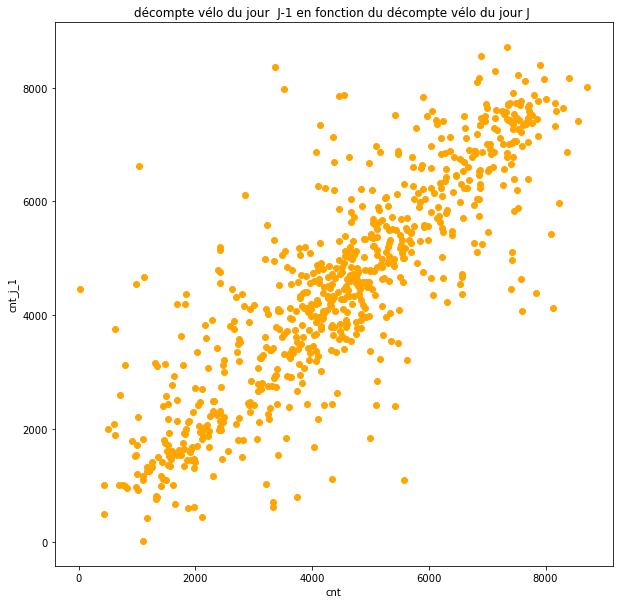

In [131]:
#  graphe de nuages ci-dessus affiche le décompte vélo du jour J-1 en fonction du décompte vélo du jour J
plt.figure( figsize= (10, 10) )
plt.scatter(cnt_data.cnt, cnt_data.cnt_j_1, c = 'orange');
plt.title('décompte vélo du jour  J-1 en fonction du décompte vélo du jour J ')
plt.xlabel('cnt')
plt.ylabel('cnt_j_1');



Le graphe de nuages ci-dessus affiche le décompte vélo du jour  J-1 en fonction du décompte vélo du jour J . On constate que la forme de cette courbe est plutot proche d'une droite linéaire ce qui confirme la corrélation entre les variables 'cnt_j_1' et 'cnt'

1.2.2.Aggrégation des données par jour de la semaine

Nous allons maintenant aggréer les données par jour de la semaine , en utilsant un groupby sur 'weekday' , le nouveau jeu de données est nommé 'data_jour_semaine'

In [132]:
# créons un jeu de données qui affiche le pourcentage de chaque classe du weathersit pour chaque jour de la semaine 
weathersit_class_s = data.groupby('weekday').weathersit.value_counts(normalize=True).unstack().fillna(0)
weathersit_class_s.head()

weathersit,clear,cloudy,rainy,snowy
weekday,,,,
Friday,0.661439,0.264978,0.000000,0.073583
Monday,0.638161,0.292860,0.000403,0.068576
Saturday,0.666799,0.257962,0.000398,0.074841
Sunday,0.705436,0.227018,0.000000,0.067546
Thursday,0.670174,0.257386,0.000000,0.072440


In [133]:
# créons un jeu de données qui contient  que le décompte de vélo du jour J pour chaque jour de la semaine 
functions_to_apply = {
    
    'cnt' : 'sum'
}
cnt_data_s = data.groupby('weekday').agg(functions_to_apply)

cnt_data_s

,cnt
weekday,
Friday,487790
Monday,455503
Saturday,477807
Sunday,444027
Thursday,485395
Tuesday,469109
Wednesday,473048


In [134]:

# fonction qui passera en argument de agg 
functions_to_apply = {
    
    'hum' : ['min','max','mean',q25,q50,q75],
    'windspeed' :['min','max','mean',q25,q50,q75],
    'temp' : ['min','max','mean',q25,q50,q75],
    'atemp' : ['min','max','mean',q25,q50,q75]
}
#le nouveau jeu de données par jour de la semaine est nommé 'data_jour_semaine' 
data_jour_semaine = pd.concat([data.groupby('weekday').agg(functions_to_apply),weathersit_class_s,cnt_data_s],axis=1)
#data.groupby('weekday').agg(functions_to_apply)

data_jour_semaine


,"(hum, min)","(hum, max)","(hum, mean)","(hum, q25)","(hum, q50)","(hum, q75)","(windspeed, min)","(windspeed, max)","(windspeed, mean)","(windspeed, q25)",...,"(atemp, max)","(atemp, mean)","(atemp, q25)","(atemp, q50)","(atemp, q75)",clear,cloudy,rainy,snowy,cnt
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,0.08,1.0,0.613840,0.46,0.61,0.77,0.0,54.0020,12.490831,7.0015,...,50.0000,15.140652,5.0012,15.0002,24.9992,0.661439,0.264978,0.000000,0.073583,487790
Monday,0.15,1.0,0.635651,0.49,0.64,0.78,0.0,47.9988,12.653819,7.0015,...,40.0010,15.409916,5.9978,17.0000,24.9992,0.638161,0.292860,0.000403,0.068576,455503
Saturday,0.12,1.0,0.619084,0.45,0.62,0.79,0.0,55.9986,13.144739,7.0015,...,42.9974,14.485994,3.9980,13.9970,24.9992,0.666799,0.257962,0.000398,0.074841,477807
Sunday,0.16,1.0,0.627994,0.48,0.63,0.78,0.0,56.9969,12.602223,7.0015,...,44.0006,14.723438,5.9978,15.0002,24.9992,0.705436,0.227018,0.000000,0.067546,444027
Thursday,0.00,1.0,0.609628,0.47,0.61,0.76,0.0,46.0022,12.863143,7.0015,...,44.9972,16.011408,5.9978,15.9968,24.9992,0.670174,0.257386,0.000000,0.072440,485395
Tuesday,0.16,1.0,0.639833,0.49,0.66,0.81,0.0,51.9987,12.858461,7.0015,...,40.0010,16.153847,7.0010,17.0000,24.9992,0.620465,0.282919,0.000000,0.096616,469109
Wednesday,0.19,1.0,0.644820,0.49,0.65,0.82,0.0,43.0006,12.540538,7.0015,...,42.0008,15.912843,5.9978,17.0000,24.9992,0.633535,0.247677,0.000404,0.118384,473048


In [135]:
# déscription des données
data_jour_semaine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Friday to Wednesday
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (hum, min)         7 non-null      float64
 1   (hum, max)         7 non-null      float64
 2   (hum, mean)        7 non-null      float64
 3   (hum, q25)         7 non-null      float64
 4   (hum, q50)         7 non-null      float64
 5   (hum, q75)         7 non-null      float64
 6   (windspeed, min)   7 non-null      float64
 7   (windspeed, max)   7 non-null      float64
 8   (windspeed, mean)  7 non-null      float64
 9   (windspeed, q25)   7 non-null      float64
 10  (windspeed, q50)   7 non-null      float64
 11  (windspeed, q75)   7 non-null      float64
 12  (temp, min)        7 non-null      float64
 13  (temp, max)        7 non-null      float64
 14  (temp, mean)       7 non-null      float64
 15  (temp, q25)        7 non-null      float64
 16  (temp, q50)        7 n

In [136]:
# indices du dataframe data_jour_semaine ==> Jours de la semaine
data_jour_semaine.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')

Le graphe ci-dessous affiche le décompte du nombre de vélos utilisés par par jour de semaine , on remarque que l'utilisation de vélo  est presque stable pendant sur les 7 jours

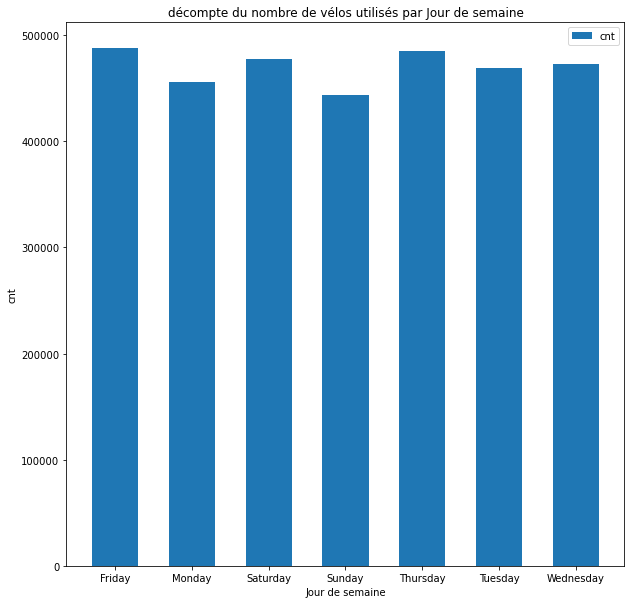

In [137]:
plt.figure( figsize= (10, 10) )
plt.bar( data_jour_semaine.index, data_jour_semaine.cnt, width = 0.6, label = "cnt")
plt.xlabel('Jour de semaine')
plt.ylabel('cnt')
plt.title("décompte du nombre de vélos utilisés par Jour de semaine")
plt.legend();

# **2.Entraînement et évaluation des modèles de machine learning**

Nous entrainerons  notre jeu de données 'data_jour_annee' avec quatre modéles : LinearRegression , RandomForestRegressor, DecisionTreeRegressor et Ridge

**2.1.Préparation des données**

In [138]:
# ajout de la variable 'cnt_lendemain' qui est le décompte de vélo  au jour n+1 au jeu de données data_jour_annee
data_jour_annee['cnt_lendemain'] = cnt_data['cnt'].shift(periods=-1)

# remplaçons les valeurs nan par la mediane 
data_jour_annee = data_jour_annee.fillna(data_jour_annee.median())

# informations des données data_jour_annee
data_jour_annee.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hum_min         731 non-null    float64
 1   hum_max         731 non-null    float64
 2   hum_mean        731 non-null    float64
 3   hum_q25         731 non-null    float64
 4   hum_q50         731 non-null    float64
 5   hum_q75         731 non-null    float64
 6   windspeed_min   731 non-null    float64
 7   windspeed_max   731 non-null    float64
 8   windspeed_mean  731 non-null    float64
 9   windspeed_q25   731 non-null    float64
 10  windspeed_q50   731 non-null    float64
 11  windspeed_q75   731 non-null    float64
 12  temp_min        731 non-null    float64
 13  temp_max        731 non-null    float64
 14  temp_mean       731 non-null    float64
 15  temp_q25        731 non-null    float64
 16  temp_q50        731 non-null    float64
 17  temp_q75        

In [139]:
# A partir du module model_selection de la librairie scikit learn on importe la fonction train_test_split
from sklearn.model_selection import train_test_split

# Instanciation du dataframe contenant les variables explicatives

X = data_jour_annee.drop(columns=['cnt_lendemain'])

# Instanciation de la serie contenant la variable cible 

y = data_jour_annee.cnt_lendemain

# Création d'un ensemble d'entraînement et d'un ensemble test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dimensions des features et target
print(X.shape, y.shape)

# dernieres lignes du data_jour_annee
data_jour_annee.tail()

(731, 36) (731,)


,hum_min,hum_max,hum_mean,hum_q25,hum_q50,hum_q75,windspeed_min,windspeed_max,windspeed_mean,windspeed_q25,...,snowy,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7,cnt_lendemain
dteday,,,,,,,,,,,,,,,,,,,,,
2012-12-27,0.49,0.93,0.652917,0.5600,0.600,0.7125,11.0014,35.0008,23.458933,16.997900,...,0.083333,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,3095.0
2012-12-28,0.49,0.70,0.590000,0.5500,0.600,0.6400,0.0000,19.0012,10.416546,8.498950,...,0.000000,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0,1341.0
2012-12-29,0.56,1.00,0.752917,0.7000,0.750,0.8100,0.0000,36.9974,8.333683,0.000000,...,0.166667,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0,1796.0
2012-12-30,0.36,0.61,0.483333,0.4100,0.510,0.5600,0.0000,43.9989,23.500529,18.001225,...,0.000000,1796,1341.0,3095.0,2114.0,441.0,1013.0,920.0,1787.0,2729.0
2012-12-31,0.44,0.69,0.577500,0.5325,0.595,0.6400,6.0032,15.0013,10.374671,8.998100,...,0.000000,2729,1796.0,1341.0,3095.0,2114.0,441.0,1013.0,920.0,4548.5


In [140]:
data_jour_annee.columns

Index(['hum_min', 'hum_max', 'hum_mean', 'hum_q25', 'hum_q50', 'hum_q75',
       'windspeed_min', 'windspeed_max', 'windspeed_mean', 'windspeed_q25',
       'windspeed_q50', 'windspeed_q75', 'temp_min', 'temp_max', 'temp_mean',
       'temp_q25', 'temp_q50', 'temp_q75', 'atemp_min', 'atemp_max',
       'atemp_mean', 'atemp_q25', 'atemp_q50', 'atemp_q75', 'clear', 'cloudy',
       'rainy', 'snowy', 'cnt', 'cnt_j_1', 'cnt_j_2', 'cnt_j_3', 'cnt_j_4',
       'cnt_j_5', 'cnt_j_6', 'cnt_j_7', 'cnt_lendemain'],
      dtype='object')

**2.2.Entraînement et évaluation du modèle  regression linéaire**

In [141]:
# A partir du module linear_model de la librairie scikit learn on importe la fonction LinearRegression

from sklearn.linear_model import LinearRegression 

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate et KFold

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

lrg_model =LinearRegression() 

#on utilise shuffle afin de mélanger les observations du dataset

lrg_folds = KFold(n_splits = 7, shuffle = True, random_state=42)

#Creation des paramétres grid
lrg_param_grid = {
   
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Instantiation  du modéle de  grid search
lrg_grid_search = GridSearchCV(estimator = lrg_model, param_grid = lrg_param_grid,
                           cv=lrg_folds, n_jobs=-1, verbose=2, scoring='r2')

# Entrainement du modéle rf_model avec X_train
lrg_grid_search.fit(X_train, y_train)

# Vérification des meilleurs parametres de de grid_search 
print(lrg_grid_search.best_params_)

Fitting 7 folds for each of 4 candidates, totalling 28 fits
{'fit_intercept': True, 'normalize': False}


In [142]:
# Paramétres optimisés du modéle LinearRegression pour le meilleur estimateur
lrg_best_grid = lrg_grid_search.best_estimator_
print(lrg_best_grid)

LinearRegression()


In [143]:
# le score r2 du meilleur estimateur
print(lrg_best_grid.score(X_test, y_test))

0.8031284750503873


**2.3.Entraînement et évaluation du modèle  RandomForest**

In [144]:
# A partir du module ensemble de la librairie scikit learn on importe la fonction RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor 

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate , KFold et GridSearchCV

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

#on utilise shuffle afin de mélanger les observations du dataset

rf_folds = KFold(n_splits = 7, shuffle = True, random_state=42)

# Creation du paramétres grid
rf_param_grid = {
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': [100, 200, 300, 1000]
}

rf_model =RandomForestRegressor() 

# Instantiation  du modéle de  grid search
rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid,
                           cv=rf_folds, n_jobs=-1, verbose=2, scoring='r2')


# Entrainement du modéle rf_model avec X_train
rf_grid_search.fit(X_train, y_train)

# Vérification des meilleurs parametres de de grid_search 
print(rf_grid_search.best_params_)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
{'max_features': 'sqrt', 'n_estimators': 1000}


In [145]:
# Paramétres optimisés du modéle randomforest pour le meilleur estimateur
rf_best_grid = rf_grid_search.best_estimator_
print(rf_best_grid)

RandomForestRegressor(max_features='sqrt', n_estimators=1000)


In [146]:
# le score r2 du meilleur estimateur
print(rf_best_grid.score(X_test, y_test))

0.7792267033273086


**2.4.Entraînement et évaluation du modèle Ridge**





In [147]:
# A partir du module linear_model de la librairie scikit learn on importe la fonction RandomForestRegressor

from sklearn.linear_model import Ridge

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate , KFold et GridSearchCV

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

#on utilise shuffle afin de mélanger les observations du dataset

ridge_folds = KFold(n_splits = 7, shuffle = True, random_state=42)

# Creation du paramétres grid
ridge_param_grid = {
    'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}


ridge_model =Ridge() 

# Instantiation  du modéle de  grid search
ridge_grid_search = GridSearchCV(estimator = ridge_model, param_grid = ridge_param_grid,
                           cv=ridge_folds, n_jobs=-1, verbose=2, scoring='r2')


# Entrainement du modéle rf_model avec X_train
ridge_grid_search.fit(X_train, y_train)

# Vérification des meilleurs parametres de de grid_search 
print(ridge_grid_search.best_params_)

Fitting 7 folds for each of 128 candidates, totalling 896 fits
{'alpha': 100, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}


In [148]:
# Paramétres optimisés du modéle Ridge pour le meilleur estimateur
ridge_best_grid = ridge_grid_search.best_estimator_
print(ridge_best_grid)

Ridge(alpha=100, solver='lsqr')


In [149]:
# le score r2 du meilleur estimateur
print(ridge_best_grid.score(X_test, y_test))

0.7995510925443807


**2.5.Entraînement et évaluation du modèle DecisionTreeRegressor**

In [150]:
# A partir du module tree de la librairie scikit learn on importe la fonction DecisionTreeRegresso

from sklearn.tree import DecisionTreeRegressor

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate , KFold et GridSearchCV

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

#on utilise shuffle afin de mélanger les observations du dataset

dtr_folds = KFold(n_splits = 7, shuffle = True, random_state=42)

# Creation du paramétres grid
dtr_param_grid = {
    
    "min_samples_split": [10, 20, 40],
    "max_depth": [2, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5, 20, 100],
    
}

dtr_model =DecisionTreeRegressor() 

# Instantiation  du modéle de  grid search
dtr_grid_search = GridSearchCV(estimator = dtr_model, param_grid = dtr_param_grid,
                           cv=dtr_folds, n_jobs=-1, verbose=2, scoring='r2')


# Entrainement du modéle rf_model avec X_train
dtr_grid_search.fit(X_train, y_train)

# Vérification des meilleurs parametres de de grid_search 
print(dtr_grid_search.best_params_)

Fitting 7 folds for each of 81 candidates, totalling 567 fits
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [151]:
# Paramétres optimisés du modéle DecisionTreeRegresso pour le meilleur estimateur
dtr_best_grid = dtr_grid_search.best_estimator_
print(dtr_best_grid)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=20)


In [152]:
# le score r2 du meilleur estimateur
print(dtr_best_grid.score(X_test, y_test))

0.766966442238213


**2.6.Performances des modéles Ridge , Random Forest , Decison Tree et linearRegression**

les scores des différents modéles sont ci-dessous :

In [153]:
print("Le coefficient de détermination R2 du modéle  Ridge:", ridge_best_grid.score(X_test, y_test))
print("Le coefficient de détermination R2 du modéle Random Forest:", rf_best_grid.score(X_test, y_test))
print("Le coefficient de détermination R2 du modéle Decison Tree:", dtr_best_grid.score(X_test, y_test))
print("Le coefficient de détermination R2 du modéle linearRegression:", lrg_best_grid.score(X_test, y_test))

Le coefficient de détermination R2 du modéle  Ridge: 0.7995510925443807
Le coefficient de détermination R2 du modéle Random Forest: 0.7792267033273086
Le coefficient de détermination R2 du modéle Decison Tree: 0.766966442238213
Le coefficient de détermination R2 du modéle linearRegression: 0.8031284750503873


Comparons maintenant graphiquement les erreurs des quatre modéles de regression

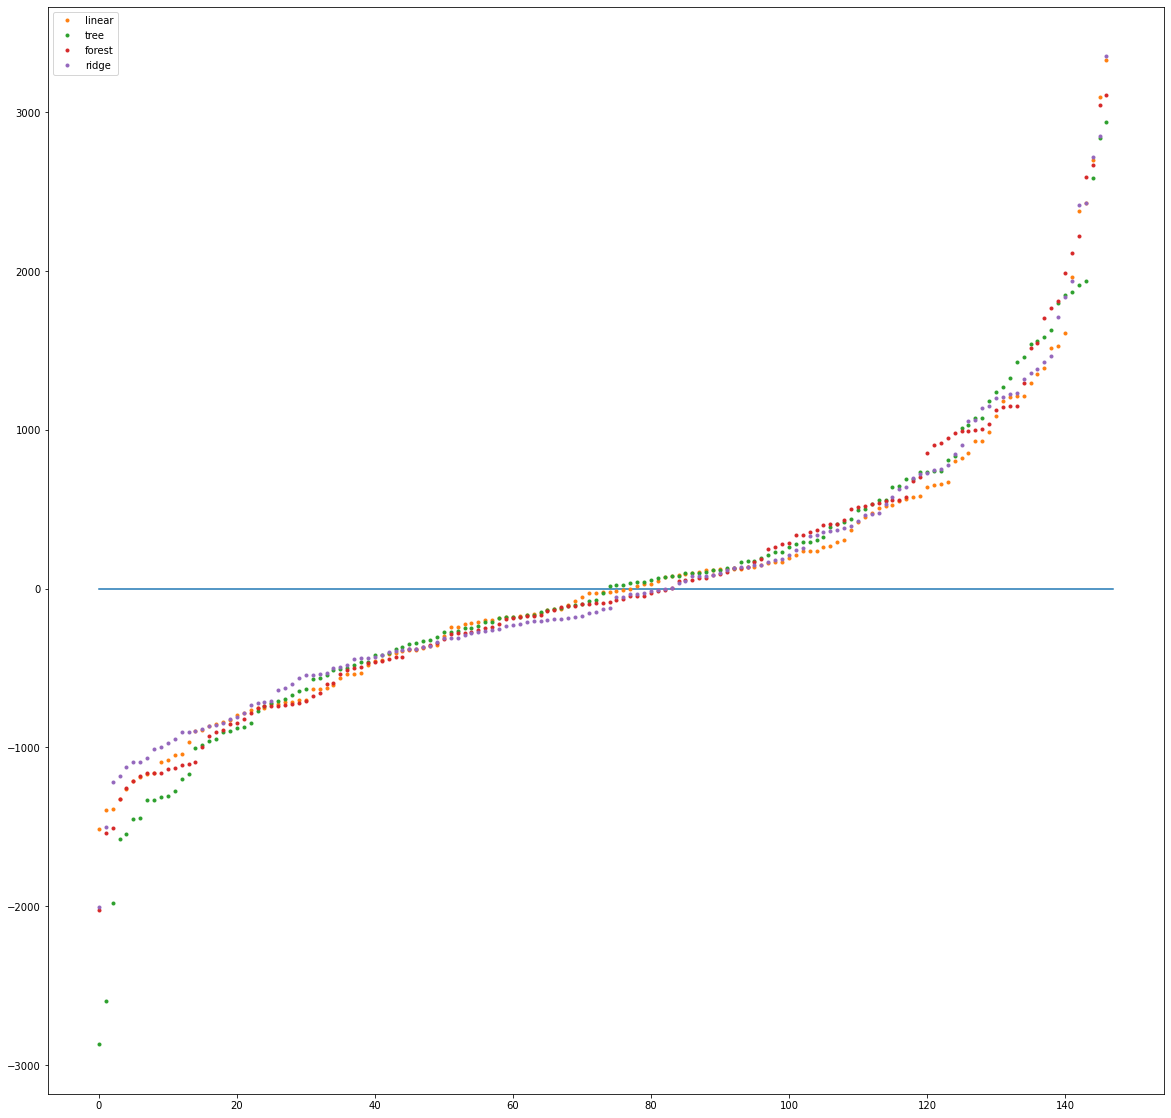

In [154]:
# prédictions de X_test avec les différents modéles
y_pred_lrg = lrg_best_grid.predict(X_test)
y_pred_ridge = ridge_best_grid.predict(X_test)
y_pred_rf = rf_best_grid.predict(X_test)
y_pred_dtr = dtr_best_grid.predict(X_test)

# Calcul des erreurs par ordre croissant
y_lrg = list(sorted(y_pred_lrg - y_test))
y_ridge = list(sorted(y_pred_ridge - y_test))
y_rf = list(sorted(y_pred_rf - y_test))
y_dtr = list(sorted(y_pred_dtr - y_test))
y_test_listed = list(sorted(y_test))

fig = plt.figure(figsize=(20, 20))
ax = plt.subplot()
ax.plot([0, len(y_test_listed)], [0, 0], '-')


ax.plot(y_lrg, '.', label="linear")
ax.plot(y_dtr, '.', label="tree")
ax.plot(y_rf, '.', label="forest")
ax.plot(y_ridge, '.', label="ridge")
#ax.plot(y_test_listed, '.', label="y_test")

ax.legend()

plt.show();

A partir du graphe ci-dessus on constate que les modéles minimisant le plus le taux d'erreur sont : Ridge et LinearRegression . Ajoutons a cela qu'ils sont les plus adéquats avec les données en se basant sur le coefficient de détermination R2. A partir de ce constat il semblerait que Ridge et LinearRegression soient les meilleurs modéles pour ce jeu de données

# **Sauvegarde des modéles**

In [155]:
import joblib

sauvegarde du modéle decisiontree

In [156]:
decisiontreModel = open("decisiontreemodel.pkl","wb")
joblib.dump(dtr_best_grid,decisiontreModel)
decisiontreModel.close()

sauvegarde du modéle randomforest

In [157]:
randomforestModel = open("randomforestModel.pkl","wb")
joblib.dump(rf_best_grid,randomforestModel)
randomforestModel.close()

sauvegarde du modéle ridge

In [158]:
ridgeModel = open("ridgeModel.pkl","wb")
joblib.dump(ridge_best_grid,ridgeModel)
ridgeModel.close()

sauvegarde du modéle linéaire

In [159]:
lineareModel = open("lineareModel.pkl","wb")
joblib.dump(lrg_best_grid,lineareModel)
lineareModel.close()

Charger les modéles du disque

In [160]:
# load the model from disk

lineareModel = open("lineareModel.pkl","rb")
loaded_model = joblib.load(lineareModel)
result = loaded_model.score(X_test, y_test)
print(result)

0.8031284750503873


In [161]:

print(data_jour_annee.columns.values)

['hum_min' 'hum_max' 'hum_mean' 'hum_q25' 'hum_q50' 'hum_q75'
 'windspeed_min' 'windspeed_max' 'windspeed_mean' 'windspeed_q25'
 'windspeed_q50' 'windspeed_q75' 'temp_min' 'temp_max' 'temp_mean'
 'temp_q25' 'temp_q50' 'temp_q75' 'atemp_min' 'atemp_max' 'atemp_mean'
 'atemp_q25' 'atemp_q50' 'atemp_q75' 'clear' 'cloudy' 'rainy' 'snowy'
 'cnt' 'cnt_j_1' 'cnt_j_2' 'cnt_j_3' 'cnt_j_4' 'cnt_j_5' 'cnt_j_6'
 'cnt_j_7' 'cnt_lendemain']


In [183]:
  hum_min = 0.44
  hum_max = 0.69
  hum_mean = 0.577500
  hum_q25 = 0.5325
  hum_q50 = 0.595
  hum_q75 = 0.6400
  windspeed_min= 6.0032
  windspeed_max= 15.0013
  windspeed_mean= 10.374671
  windspeed_q25= 8.998100
  windspeed_q50= 11.00140
  windspeed_q75= 12.998000
  temp_min= -1.42
  temp_max= 5.16
  temp_mean= 2.144167
  temp_q25= -0.48
  temp_q50= 2.81
  temp_q75= 4.220
  atemp_min= -6.0010
  atemp_max= 3.0014
  atemp_mean= -1.249825
  atemp_q25= -4.00120
  atemp_q50= -0.9982
  atemp_q75= 1.25075
  clear= 0.500000
  cloudy= 0.500000
  rainy= 0
  snowy= 0
  cnt= 2729
  cnt_j_1= 1796
  cnt_j_2= 1341
  cnt_j_3= 3095
  cnt_j_4= 2114
  cnt_j_5= 441
  cnt_j_6= 1013
  cnt_j_7= 920

In [164]:
data = {
  "hum_min": 0.44,
  "hum_max": 0.69,
  "hum_mean": 0.577500,
  "hum_q25": 0.5325,
  "hum_q50": 0.595,
  "hum_q75": 0.6400,
  "windspeed_min": 6.0032,
  "windspeed_max": 15.0013,
  "windspeed_mean": 10.374671,
  "windspeed_q25": 8.998100,
  "windspeed_q50": 11.00140,
  "windspeed_q75": 12.998000,
  "temp_min": -1.42,
  "temp_max": 5.16,
  "temp_mean": 2.144167,
  "temp_q25": -0.48,
  "temp_q50": 2.81,
  "temp_q75": 4.220,
  "atemp_min": -6.0010,
  "atemp_max": 3.0014,
  "atemp_mean": -1.249825,
  "atemp_q25": -4.00120,
  "atemp_q50": -0.9982,
  "atemp_q75": 1.25075,
  "clear": 0.500000,
  "cloudy": 0.500000,
  "rainy": 0,
  "snowy": 0,
  "cnt": 2729,
  "cnt_j_1": 1796,
  "cnt_j_2": 1341,
  "cnt_j_3": 3095,
  "cnt_j_4": 2114,
  "cnt_j_5": 441,
  "cnt_j_6": 1013,
  "cnt_j_7": 920
}

In [165]:
data

{'hum_min': 0.44,
 'hum_max': 0.69,
 'hum_mean': 0.5775,
 'hum_q25': 0.5325,
 'hum_q50': 0.595,
 'hum_q75': 0.64,
 'windspeed_min': 6.0032,
 'windspeed_max': 15.0013,
 'windspeed_mean': 10.374671,
 'windspeed_q25': 8.9981,
 'windspeed_q50': 11.0014,
 'windspeed_q75': 12.998,
 'temp_min': -1.42,
 'temp_max': 5.16,
 'temp_mean': 2.144167,
 'temp_q25': -0.48,
 'temp_q50': 2.81,
 'temp_q75': 4.22,
 'atemp_min': -6.001,
 'atemp_max': 3.0014,
 'atemp_mean': -1.249825,
 'atemp_q25': -4.0012,
 'atemp_q50': -0.9982,
 'atemp_q75': 1.25075,
 'clear': 0.5,
 'cloudy': 0.5,
 'rainy': 0,
 'snowy': 0,
 'cnt': 2729,
 'cnt_j_1': 1796,
 'cnt_j_2': 1341,
 'cnt_j_3': 3095,
 'cnt_j_4': 2114,
 'cnt_j_5': 441,
 'cnt_j_6': 1013,
 'cnt_j_7': 920}

In [184]:
X_b = [hum_min,hum_max,hum_mean,hum_q25,hum_q50,hum_q75,
       windspeed_min, windspeed_max, windspeed_mean, windspeed_q25, windspeed_q50, windspeed_q75,
       temp_min, temp_max, temp_mean, temp_q25, temp_q50, temp_q75,
       atemp_min, atemp_max, atemp_mean, atemp_q25, atemp_q50, atemp_q75,
       clear, cloudy, rainy , snowy,
       cnt , cnt_j_1 , cnt_j_2 , cnt_j_3, cnt_j_4, cnt_j_5 , cnt_j_6, cnt_j_7]

In [185]:
X_bike = np.array([[hum_min,hum_max,hum_mean,hum_q25,hum_q50,hum_q75,windspeed_min, windspeed_max, windspeed_mean, windspeed_q25, windspeed_q50, windspeed_q75,temp_min, temp_max, temp_mean, temp_q25, temp_q50, temp_q75,atemp_min, atemp_max, atemp_mean, atemp_q25, atemp_q50, atemp_q75,clear, cloudy, rainy , snowy,cnt , cnt_j_1 , cnt_j_2 , cnt_j_3, cnt_j_4, cnt_j_5 , cnt_j_6, cnt_j_7]])

In [186]:
X_bike.shape
print(X_bike)

[[ 4.4000000e-01  6.9000000e-01  5.7750000e-01  5.3250000e-01
   5.9500000e-01  6.4000000e-01  6.0032000e+00  1.5001300e+01
   1.0374671e+01  8.9981000e+00  1.1001400e+01  1.2998000e+01
  -1.4200000e+00  5.1600000e+00  2.1441670e+00 -4.8000000e-01
   2.8100000e+00  4.2200000e+00 -6.0010000e+00  3.0014000e+00
  -1.2498250e+00 -4.0012000e+00 -9.9820000e-01  1.2507500e+00
   5.0000000e-01  5.0000000e-01  0.0000000e+00  0.0000000e+00
   2.7290000e+03  1.7960000e+03  1.3410000e+03  3.0950000e+03
   2.1140000e+03  4.4100000e+02  1.0130000e+03  9.2000000e+02]]


In [188]:
preidction = rf_best_grid.predict(X_bike)

In [189]:
print(preidction)

[3622.943]
